In [1]:
#MNIST - images of handwritten numbers 
#goal - to predict that no. using KNN

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Step 1. Data Preparation

In [3]:
df = pd.read_csv('jupyter folder/train.csv')
print(df.shape)

(42000, 785)


In [4]:
df.columns
#i.e. each image is stored in a row (28*28) pixels in every row
#here the images belon to one channel only as these are grayscale images
#so we need to reshape it

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#creating numpy array
data = df.values #whole df copied as a numpy matrix
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [7]:
x = data[:,1:] #images data
y = data[:,0] #labels

print(x.shape,y.shape)

(42000, 784) (42000,)


In [8]:
#now splitting into testing and training data
split = int(0.8*x.shape[0]) #training data (this many rows (images) will pose as training dataset)

xtrain = x[:split,:]
ytrain = y[:split]

xtest = x[split:,:]
ytest = y[split:]

print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)
#now the data is ready

(33600, 784) (33600,)
(8400, 784) (8400,)


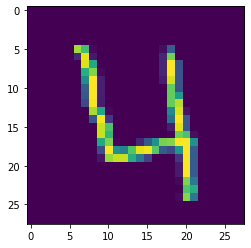

In [9]:
#visualising some samples
def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img)
    plt.show()
    
#checking the image of the 3rd row:
drawImg(xtrain[3])

Actually, maptlotlib gave automatic coloring to this black and white image so we need to specify this beforehand

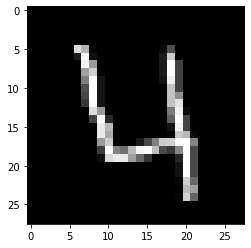

4


In [10]:
#visualising some samples
def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
    
#checking the image of the 3rd row:
drawImg(xtrain[3])
print(ytrain[3])

### Step 2. K-NN
earlier we used 2d space with each point representing two features x1 and x2 now we have each element(image) with 784 pixels. Now we have a space of 784 dimensions.
We are going to compute distance of sample(image of no.) from all other points 

In [11]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(x,z,qpoint,k=7):
    dists=[]
    for i in range(x.shape[0]):
        d = dist(x[i],qpoint)
        dists.append((d,z[i]))
    dists = np.array(sorted(dists))[:k]
    tupled_dists = np.unique(dists,return_counts=True)
    index_of_max_occured_label = tupled_dists[1].argmax() #return index of highest element
    predicted_label = tupled_dists[0][index_of_max_occured_label]
    return int(predicted_label)

### Step 3. Making predictions 
everything is going to happen at prediciton time. The training time will be O(1) as knn is not learning anything here

In [12]:
pred = knn(xtrain,ytrain,xtest[0])
print(int(pred))
pred2 = knn(xtrain,ytrain,xtest[1])
print(int(pred2))

0
7


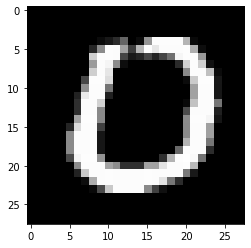

0


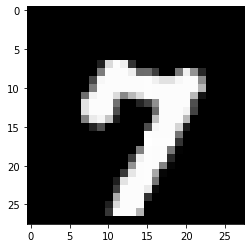

7


In [13]:
#checking...
drawImg(xtest[0])
print(ytest[0])
drawImg(xtest[1])
print(ytest[1])
# so our predictions were correct indeed

## Writing a method to compute the accuracy of KNN over the whole test set:
takes time = O(NQ)
N=no. of samples in training data
Q=no. of samples in testing data
time is taken during testing only.
It is non-parametric as not learning anything from training data

In [24]:
def accuracy(train,trl,test,tel):
    count=0
    for i in range(test.shape[0]):
        if knn(train,trl,test[i]) == tel[i]:
            count+=1
    
        print("On Test Case: {} / 8400, predicted accuracy = {}%".format(i+1,round((count/(i+1))*100,2)))
    
    print((count/test.shape[0])*100)
    
accuracy(xtrain,ytrain,xtest,ytest)

On Test Case: 1 / 8400, predicted accuracy = 100.0%
On Test Case: 2 / 8400, predicted accuracy = 100.0%
On Test Case: 3 / 8400, predicted accuracy = 100.0%
On Test Case: 4 / 8400, predicted accuracy = 100.0%
On Test Case: 5 / 8400, predicted accuracy = 100.0%
On Test Case: 6 / 8400, predicted accuracy = 100.0%
On Test Case: 7 / 8400, predicted accuracy = 100.0%
On Test Case: 8 / 8400, predicted accuracy = 100.0%
On Test Case: 9 / 8400, predicted accuracy = 88.89%
On Test Case: 10 / 8400, predicted accuracy = 90.0%
On Test Case: 11 / 8400, predicted accuracy = 90.91%
On Test Case: 12 / 8400, predicted accuracy = 91.67%
On Test Case: 13 / 8400, predicted accuracy = 92.31%
On Test Case: 14 / 8400, predicted accuracy = 92.86%
On Test Case: 15 / 8400, predicted accuracy = 93.33%
On Test Case: 16 / 8400, predicted accuracy = 93.75%
On Test Case: 17 / 8400, predicted accuracy = 94.12%
On Test Case: 18 / 8400, predicted accuracy = 94.44%
On Test Case: 19 / 8400, predicted accuracy = 94.74%
On 

On Test Case: 156 / 8400, predicted accuracy = 97.44%
On Test Case: 157 / 8400, predicted accuracy = 97.45%
On Test Case: 158 / 8400, predicted accuracy = 97.47%
On Test Case: 159 / 8400, predicted accuracy = 97.48%
On Test Case: 160 / 8400, predicted accuracy = 97.5%
On Test Case: 161 / 8400, predicted accuracy = 97.52%
On Test Case: 162 / 8400, predicted accuracy = 97.53%
On Test Case: 163 / 8400, predicted accuracy = 97.55%
On Test Case: 164 / 8400, predicted accuracy = 97.56%
On Test Case: 165 / 8400, predicted accuracy = 97.58%
On Test Case: 166 / 8400, predicted accuracy = 97.59%
On Test Case: 167 / 8400, predicted accuracy = 97.6%
On Test Case: 168 / 8400, predicted accuracy = 97.62%
On Test Case: 169 / 8400, predicted accuracy = 97.63%
On Test Case: 170 / 8400, predicted accuracy = 97.65%
On Test Case: 171 / 8400, predicted accuracy = 97.66%
On Test Case: 172 / 8400, predicted accuracy = 97.67%
On Test Case: 173 / 8400, predicted accuracy = 97.69%
On Test Case: 174 / 8400, pred

On Test Case: 308 / 8400, predicted accuracy = 98.38%
On Test Case: 309 / 8400, predicted accuracy = 98.38%
On Test Case: 310 / 8400, predicted accuracy = 98.39%
On Test Case: 311 / 8400, predicted accuracy = 98.39%
On Test Case: 312 / 8400, predicted accuracy = 98.4%
On Test Case: 313 / 8400, predicted accuracy = 98.4%
On Test Case: 314 / 8400, predicted accuracy = 98.41%
On Test Case: 315 / 8400, predicted accuracy = 98.41%
On Test Case: 316 / 8400, predicted accuracy = 98.42%
On Test Case: 317 / 8400, predicted accuracy = 98.42%
On Test Case: 318 / 8400, predicted accuracy = 98.43%
On Test Case: 319 / 8400, predicted accuracy = 98.43%
On Test Case: 320 / 8400, predicted accuracy = 98.44%
On Test Case: 321 / 8400, predicted accuracy = 98.44%
On Test Case: 322 / 8400, predicted accuracy = 98.45%
On Test Case: 323 / 8400, predicted accuracy = 98.45%
On Test Case: 324 / 8400, predicted accuracy = 98.46%
On Test Case: 325 / 8400, predicted accuracy = 98.46%
On Test Case: 326 / 8400, pred

On Test Case: 460 / 8400, predicted accuracy = 98.26%
On Test Case: 461 / 8400, predicted accuracy = 98.26%
On Test Case: 462 / 8400, predicted accuracy = 98.27%
On Test Case: 463 / 8400, predicted accuracy = 98.27%
On Test Case: 464 / 8400, predicted accuracy = 98.28%
On Test Case: 465 / 8400, predicted accuracy = 98.28%
On Test Case: 466 / 8400, predicted accuracy = 98.28%
On Test Case: 467 / 8400, predicted accuracy = 98.29%
On Test Case: 468 / 8400, predicted accuracy = 98.29%
On Test Case: 469 / 8400, predicted accuracy = 98.29%
On Test Case: 470 / 8400, predicted accuracy = 98.3%
On Test Case: 471 / 8400, predicted accuracy = 98.3%
On Test Case: 472 / 8400, predicted accuracy = 98.31%
On Test Case: 473 / 8400, predicted accuracy = 98.31%
On Test Case: 474 / 8400, predicted accuracy = 98.31%
On Test Case: 475 / 8400, predicted accuracy = 98.32%
On Test Case: 476 / 8400, predicted accuracy = 98.32%
On Test Case: 477 / 8400, predicted accuracy = 98.11%
On Test Case: 478 / 8400, pred

On Test Case: 612 / 8400, predicted accuracy = 97.39%
On Test Case: 613 / 8400, predicted accuracy = 97.39%
On Test Case: 614 / 8400, predicted accuracy = 97.39%
On Test Case: 615 / 8400, predicted accuracy = 97.4%
On Test Case: 616 / 8400, predicted accuracy = 97.4%
On Test Case: 617 / 8400, predicted accuracy = 97.41%
On Test Case: 618 / 8400, predicted accuracy = 97.41%
On Test Case: 619 / 8400, predicted accuracy = 97.42%
On Test Case: 620 / 8400, predicted accuracy = 97.42%
On Test Case: 621 / 8400, predicted accuracy = 97.42%
On Test Case: 622 / 8400, predicted accuracy = 97.43%
On Test Case: 623 / 8400, predicted accuracy = 97.43%
On Test Case: 624 / 8400, predicted accuracy = 97.44%
On Test Case: 625 / 8400, predicted accuracy = 97.44%
On Test Case: 626 / 8400, predicted accuracy = 97.44%
On Test Case: 627 / 8400, predicted accuracy = 97.45%
On Test Case: 628 / 8400, predicted accuracy = 97.45%
On Test Case: 629 / 8400, predicted accuracy = 97.46%
On Test Case: 630 / 8400, pred

On Test Case: 765 / 8400, predicted accuracy = 97.78%
On Test Case: 766 / 8400, predicted accuracy = 97.78%
On Test Case: 767 / 8400, predicted accuracy = 97.78%
On Test Case: 768 / 8400, predicted accuracy = 97.79%
On Test Case: 769 / 8400, predicted accuracy = 97.79%
On Test Case: 770 / 8400, predicted accuracy = 97.79%
On Test Case: 771 / 8400, predicted accuracy = 97.8%
On Test Case: 772 / 8400, predicted accuracy = 97.8%
On Test Case: 773 / 8400, predicted accuracy = 97.8%
On Test Case: 774 / 8400, predicted accuracy = 97.67%
On Test Case: 775 / 8400, predicted accuracy = 97.68%
On Test Case: 776 / 8400, predicted accuracy = 97.68%
On Test Case: 777 / 8400, predicted accuracy = 97.68%
On Test Case: 778 / 8400, predicted accuracy = 97.69%
On Test Case: 779 / 8400, predicted accuracy = 97.69%
On Test Case: 780 / 8400, predicted accuracy = 97.69%
On Test Case: 781 / 8400, predicted accuracy = 97.7%
On Test Case: 782 / 8400, predicted accuracy = 97.7%
On Test Case: 783 / 8400, predict

On Test Case: 917 / 8400, predicted accuracy = 97.49%
On Test Case: 918 / 8400, predicted accuracy = 97.49%
On Test Case: 919 / 8400, predicted accuracy = 97.39%
On Test Case: 920 / 8400, predicted accuracy = 97.39%
On Test Case: 921 / 8400, predicted accuracy = 97.39%
On Test Case: 922 / 8400, predicted accuracy = 97.4%
On Test Case: 923 / 8400, predicted accuracy = 97.4%
On Test Case: 924 / 8400, predicted accuracy = 97.4%
On Test Case: 925 / 8400, predicted accuracy = 97.41%
On Test Case: 926 / 8400, predicted accuracy = 97.41%
On Test Case: 927 / 8400, predicted accuracy = 97.41%
On Test Case: 928 / 8400, predicted accuracy = 97.41%
On Test Case: 929 / 8400, predicted accuracy = 97.42%
On Test Case: 930 / 8400, predicted accuracy = 97.42%
On Test Case: 931 / 8400, predicted accuracy = 97.42%
On Test Case: 932 / 8400, predicted accuracy = 97.42%
On Test Case: 933 / 8400, predicted accuracy = 97.43%
On Test Case: 934 / 8400, predicted accuracy = 97.43%
On Test Case: 935 / 8400, predi

On Test Case: 1068 / 8400, predicted accuracy = 97.28%
On Test Case: 1069 / 8400, predicted accuracy = 97.29%
On Test Case: 1070 / 8400, predicted accuracy = 97.29%
On Test Case: 1071 / 8400, predicted accuracy = 97.29%
On Test Case: 1072 / 8400, predicted accuracy = 97.29%
On Test Case: 1073 / 8400, predicted accuracy = 97.3%
On Test Case: 1074 / 8400, predicted accuracy = 97.3%
On Test Case: 1075 / 8400, predicted accuracy = 97.3%
On Test Case: 1076 / 8400, predicted accuracy = 97.3%
On Test Case: 1077 / 8400, predicted accuracy = 97.31%
On Test Case: 1078 / 8400, predicted accuracy = 97.31%
On Test Case: 1079 / 8400, predicted accuracy = 97.31%
On Test Case: 1080 / 8400, predicted accuracy = 97.31%
On Test Case: 1081 / 8400, predicted accuracy = 97.32%
On Test Case: 1082 / 8400, predicted accuracy = 97.32%
On Test Case: 1083 / 8400, predicted accuracy = 97.32%
On Test Case: 1084 / 8400, predicted accuracy = 97.32%
On Test Case: 1085 / 8400, predicted accuracy = 97.33%
On Test Case: 

On Test Case: 1218 / 8400, predicted accuracy = 97.21%
On Test Case: 1219 / 8400, predicted accuracy = 97.21%
On Test Case: 1220 / 8400, predicted accuracy = 97.21%
On Test Case: 1221 / 8400, predicted accuracy = 97.22%
On Test Case: 1222 / 8400, predicted accuracy = 97.22%
On Test Case: 1223 / 8400, predicted accuracy = 97.22%
On Test Case: 1224 / 8400, predicted accuracy = 97.22%
On Test Case: 1225 / 8400, predicted accuracy = 97.22%
On Test Case: 1226 / 8400, predicted accuracy = 97.23%
On Test Case: 1227 / 8400, predicted accuracy = 97.23%
On Test Case: 1228 / 8400, predicted accuracy = 97.23%
On Test Case: 1229 / 8400, predicted accuracy = 97.23%
On Test Case: 1230 / 8400, predicted accuracy = 97.24%
On Test Case: 1231 / 8400, predicted accuracy = 97.24%
On Test Case: 1232 / 8400, predicted accuracy = 97.24%
On Test Case: 1233 / 8400, predicted accuracy = 97.24%
On Test Case: 1234 / 8400, predicted accuracy = 97.24%
On Test Case: 1235 / 8400, predicted accuracy = 97.25%
On Test Ca

On Test Case: 1368 / 8400, predicted accuracy = 97.3%
On Test Case: 1369 / 8400, predicted accuracy = 97.3%
On Test Case: 1370 / 8400, predicted accuracy = 97.3%
On Test Case: 1371 / 8400, predicted accuracy = 97.3%
On Test Case: 1372 / 8400, predicted accuracy = 97.3%
On Test Case: 1373 / 8400, predicted accuracy = 97.31%
On Test Case: 1374 / 8400, predicted accuracy = 97.31%
On Test Case: 1375 / 8400, predicted accuracy = 97.31%
On Test Case: 1376 / 8400, predicted accuracy = 97.31%
On Test Case: 1377 / 8400, predicted accuracy = 97.31%
On Test Case: 1378 / 8400, predicted accuracy = 97.31%
On Test Case: 1379 / 8400, predicted accuracy = 97.32%
On Test Case: 1380 / 8400, predicted accuracy = 97.32%
On Test Case: 1381 / 8400, predicted accuracy = 97.32%
On Test Case: 1382 / 8400, predicted accuracy = 97.32%
On Test Case: 1383 / 8400, predicted accuracy = 97.32%
On Test Case: 1384 / 8400, predicted accuracy = 97.33%
On Test Case: 1385 / 8400, predicted accuracy = 97.33%
On Test Case: 1

On Test Case: 1518 / 8400, predicted accuracy = 97.3%
On Test Case: 1519 / 8400, predicted accuracy = 97.3%
On Test Case: 1520 / 8400, predicted accuracy = 97.3%
On Test Case: 1521 / 8400, predicted accuracy = 97.3%
On Test Case: 1522 / 8400, predicted accuracy = 97.31%
On Test Case: 1523 / 8400, predicted accuracy = 97.31%
On Test Case: 1524 / 8400, predicted accuracy = 97.31%
On Test Case: 1525 / 8400, predicted accuracy = 97.31%
On Test Case: 1526 / 8400, predicted accuracy = 97.31%
On Test Case: 1527 / 8400, predicted accuracy = 97.31%
On Test Case: 1528 / 8400, predicted accuracy = 97.32%
On Test Case: 1529 / 8400, predicted accuracy = 97.32%
On Test Case: 1530 / 8400, predicted accuracy = 97.32%
On Test Case: 1531 / 8400, predicted accuracy = 97.32%
On Test Case: 1532 / 8400, predicted accuracy = 97.32%
On Test Case: 1533 / 8400, predicted accuracy = 97.33%
On Test Case: 1534 / 8400, predicted accuracy = 97.33%
On Test Case: 1535 / 8400, predicted accuracy = 97.33%
On Test Case: 

KeyboardInterrupt: 